<a href="https://colab.research.google.com/github/MichaelGajhede/superdex_200_calibration/blob/main/superdex_200_calib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data extracted from the calibration figure in the superdex 10/300 gl manual using gemini
data = {
    'Sample': ['1. Thyroglobulin (Mr 669 000) 3 mg/mL',
               '2. Ferritin (Mr 440 000) 0.3 mg/mL',
               '3. Aldolase (Mr 158 000) 3 mg/mL',
               '4. Conalbumin (Mr 75 000) 3 mg/mL',
               '5. Ovalbumin (Mr 44 000) 3 mg/mL',
               '6. Carbonic anhydrase (Mr 29 000) 3 mg/mL',
               '7. Ribonuclease A (Mr 13 700) 3 mg/mL'],
    'Elution Volume (mL)': [8.5, 9.5, 11.5, 13.5, 14.5, 16.5, 17.5]
}

# Create the DataFrame
df_standards = pd.DataFrame(data)

# Extract the number from within the parentheses
df_standards['MW (Mr)'] = df_chromatogram['Sample'].str.extract(r'Mr\s(\d+)')

# Convert the extracted 'MW (Mr)' column to numeric
df_standards['MW (Mr)'] = pd.to_numeric(df_chromatogram['MW (Mr)'])*1000


# Print the resulting DataFrame
print(df_standards)


                                      Sample  Elution Volume (mL)  MW (Mr)
0      1. Thyroglobulin (Mr 669 000) 3 mg/mL                  8.5   669000
1         2. Ferritin (Mr 440 000) 0.3 mg/mL                  9.5   440000
2           3. Aldolase (Mr 158 000) 3 mg/mL                 11.5   158000
3          4. Conalbumin (Mr 75 000) 3 mg/mL                 13.5    75000
4           5. Ovalbumin (Mr 44 000) 3 mg/mL                 14.5    44000
5  6. Carbonic anhydrase (Mr 29 000) 3 mg/mL                 16.5    29000
6      7. Ribonuclease A (Mr 13 700) 3 mg/mL                 17.5    13000


Slope and intercept: [-0.14724835  2.00071474]


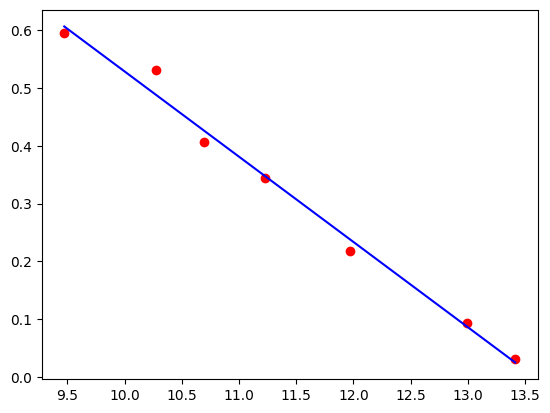

,Sample,Elution Volume (mL),MW (Mr),K average
0,1. Thyroglobulin (Mr 669 000) 3 mg/mL,8.5,669000,0.03125
1,2. Ferritin (Mr 440 000) 0.3 mg/mL,9.5,440000,0.09375
2,3. Aldolase (Mr 158 000) 3 mg/mL,11.5,158000,0.21875
3,4. Conalbumin (Mr 75 000) 3 mg/mL,13.5,75000,0.34375
4,5. Ovalbumin (Mr 44 000) 3 mg/mL,14.5,44000,0.40625
5,6. Carbonic anhydrase (Mr 29 000) 3 mg/mL,16.5,29000,0.53125
6,7. Ribonuclease A (Mr 13 700) 3 mg/mL,17.5,13000,0.59375


In [19]:
# least squares fit of Kav=a*lnMW+b where Kav=(Vret-Vo)/(Vcol-Vo) determine intercept and slope
import numpy as np
from scipy.sparse import rand
from scipy.optimize import curve_fit

V0 = 8 #Superdex 200 10/300 increase void volume
Vcol = 24 #Superdex 200 10/300 increase total volume
Kavs =[]
for i in df_standards['Elution Volume (mL)']:
    Kav = (i-V0)/(Vcol-V0)
    Kavs.append(Kav)

df_standards['K average'] = Kavs



x = np.log(df_standards['MW (Mr)'].to_numpy())
y = df_standards['K average'].to_numpy()

def func(x, a, b):
    y = a*x + b
    return y

alpha_MW = curve_fit(func, xdata = x, ydata = y)[0] # returns slope and intercept tupple
print('Slope and intercept:', alpha_MW)

plt.plot(x, y, 'ro', label='K Average observed')
plt.plot(x, func(x, *alpha_MW), 'b-', label='K average fit')
plt.show()

df_standards


In [21]:
# calculate MW of sample with known elution time

sample_elution_ml = 15

Kav = (sample_elution_ml-V0)/(Vcol-V0)
MW_sample = int(np.exp((Kav- alpha_MW[1])/alpha_MW[0]))
print(MW_sample)


40789
